# Global Urban Metabolism Database

In [30]:
#####################
####Load Packages####
#####################

library(ggplot2)
library(plyr)
library(googlesheets)
library(dplyr)
library(data.table)
library(corrplot)
library(cowplot)
library(grid)
library(RColorBrewer)
library(apsrtable)

In [31]:
#####################
####   Set  WD   ####
#####################

setwd("/home/jm/Dropbox/PhD/thesis/papers/isie17")

In [32]:
#####################
####  Load Data  ####
#####################

ugmdb <- fread('https://docs.google.com/spreadsheets/d/1DngfcBzoMaSJpl4WIeedjgzSVL5VxEM2tShhnyGHdAU/pub?gid=1279578510&single=true&output=csv')



Warning message in fread("https://docs.google.com/spreadsheets/d/1DngfcBzoMaSJpl4WIeedjgzSVL5VxEM2tShhnyGHdAU/pub?gid=1279578510&single=true&output=csv"):
“Bumped column 9 to type character on data row 560, field contains 'na'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

In [91]:
ugmdb$Value <- as.numeric(ugmdb$Value)
str(ugmdb)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

Classes ‘data.table’ and 'data.frame':	6151 obs. of  12 variables:
 $ Paper_doi         : chr  "10.1073/pnas.1504315112" "10.1073/pnas.1504315112" "10.1073/pnas.1504315112" "10.1073/pnas.1504315112" ...
 $ Paper_name        : chr  "Energy and material flows of megacities" "Energy and material flows of megacities" "Energy and material flows of megacities" "Energy and material flows of megacities" ...
 $ City              : chr  "London" "London" "London" "London" ...
 $ Area              : chr  "Urban Characteristics" "Urban Characteristics" "Urban Characteristics" "Urban Characteristics" ...
 $ subArea           : chr  "demography" "demography" "demography" "demography" ...
 $ Year              : int  2010 2001 2006 2011 2001 2001 2006 2010 2001 2006 ...
 $ Year (end)        : int  NA NA NA NA 2011 NA NA NA NA NA ...
 $ Indicator         : chr  "Brinkhoff population" "Population" "Population" "Population" ...
 $ Value             : num  1.24e+07 7.32e+06 7.55e+06 8.17e+06 1.16e+01 ...


In [34]:
ugmdb <- ugmdb[ugmdb$Paper_doi!="",]

In [9]:
## viz

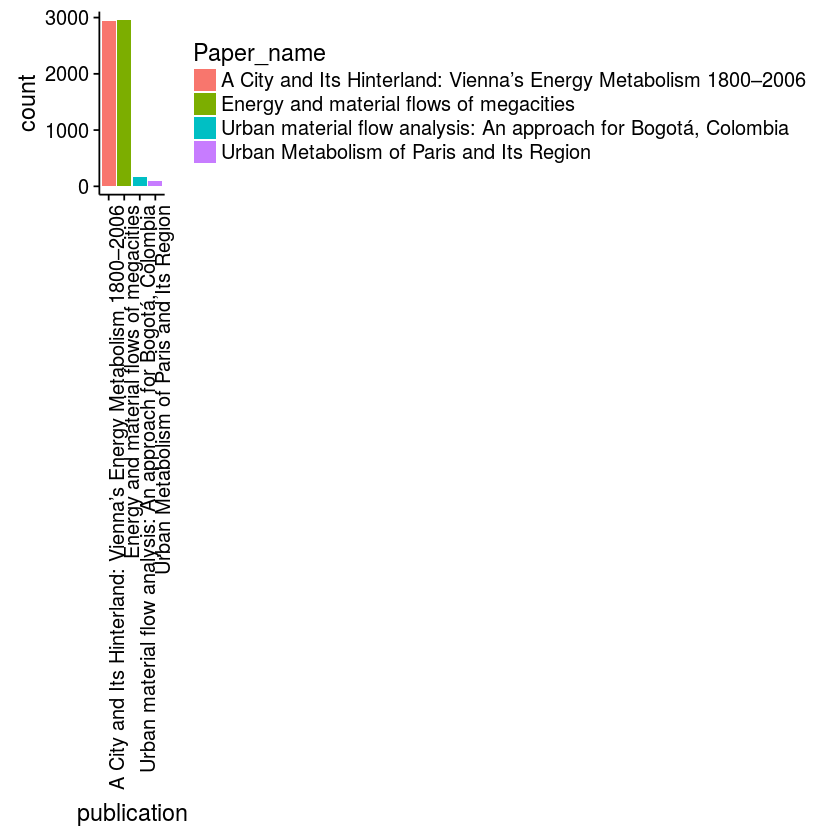

In [7]:
#publications
ggplot(ugmdb)+geom_bar(aes(Paper_name, fill=Paper_name))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("publication")

In [26]:
ugmdb_clear <- ugmdb[ugmdb$City!="Paris and its dense urban Petite couronne suburbs"&ugmdb$City!="Île-de-France"&ugmdb$City!="Vienna",]


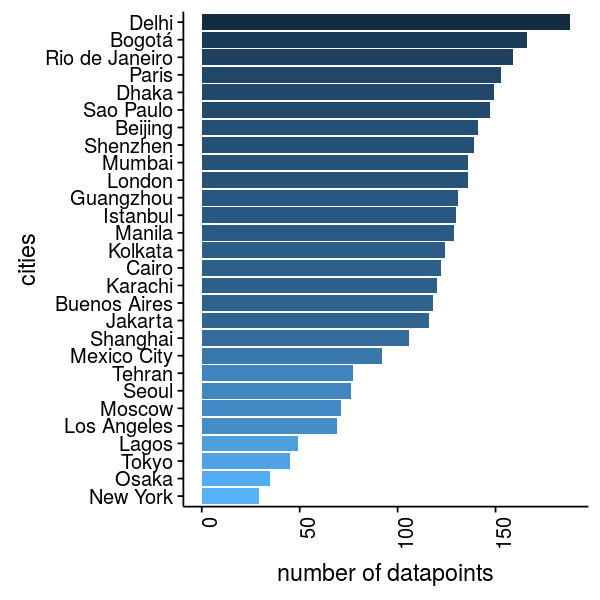

In [27]:
city_table <- data.frame(table(ugmdb_clear$City))

ggplot(city_table)+
    geom_bar(aes(x=reorder(Var1, Freq), y=Freq, fill=-Freq), stat="identity")+
coord_flip()+
theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+
xlab("cities")+ylab("number of datapoints")

In [7]:
options(repr.plot.width=5, repr.plot.height=5)

In [ ]:
city_table <- data.frame(table(ugmdb_clear$City))


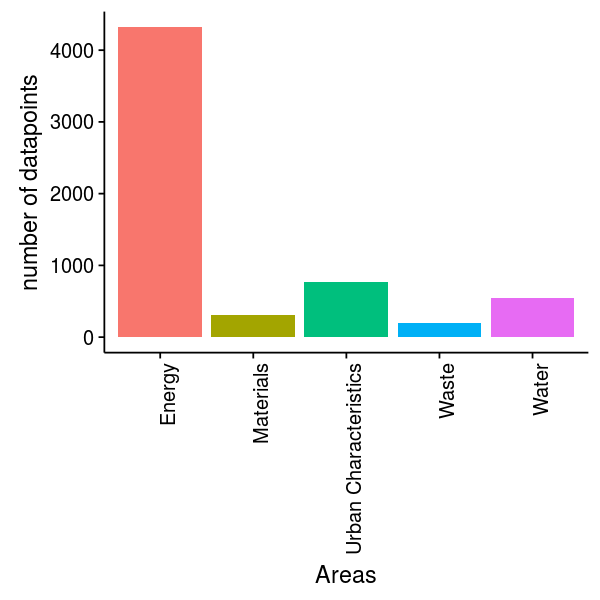

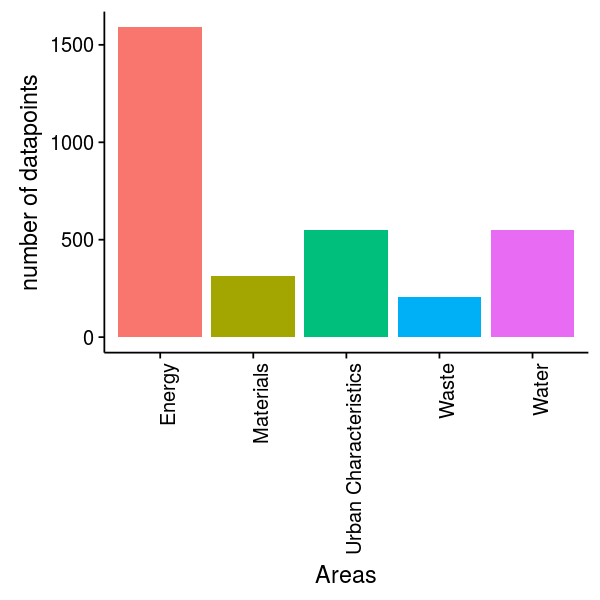

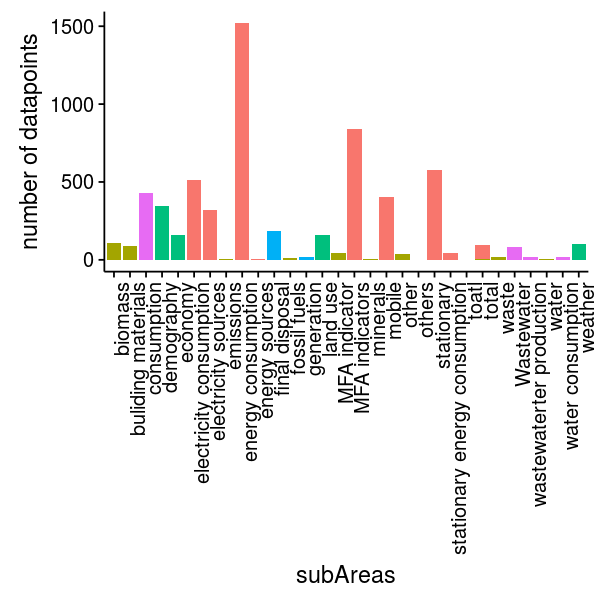

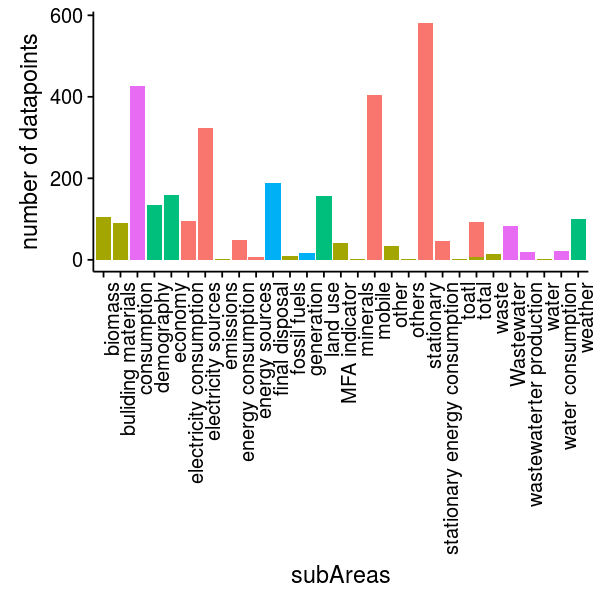

In [36]:
#Area and Subarea
ggplot(ugmdb)+geom_bar(aes(Area, fill=Area))+theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Areas")+ylab("number of datapoints")
ggplot(ugmdb[ugmdb$City!="Vienna",])+geom_bar(aes(Area, fill=Area))+theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Areas")+ylab("number of datapoints")


ggplot(ugmdb)+geom_bar(aes(subArea, fill=Area))+theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+xlab("subAreas")+ylab("number of datapoints")
ggplot(ugmdb[ugmdb$City!="Vienna",])+geom_bar(aes(subArea, fill=Area))+theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+xlab("subAreas")+ylab("number of datapoints")




Warning message:
“Removed 29 rows containing non-finite values (stat_count).”

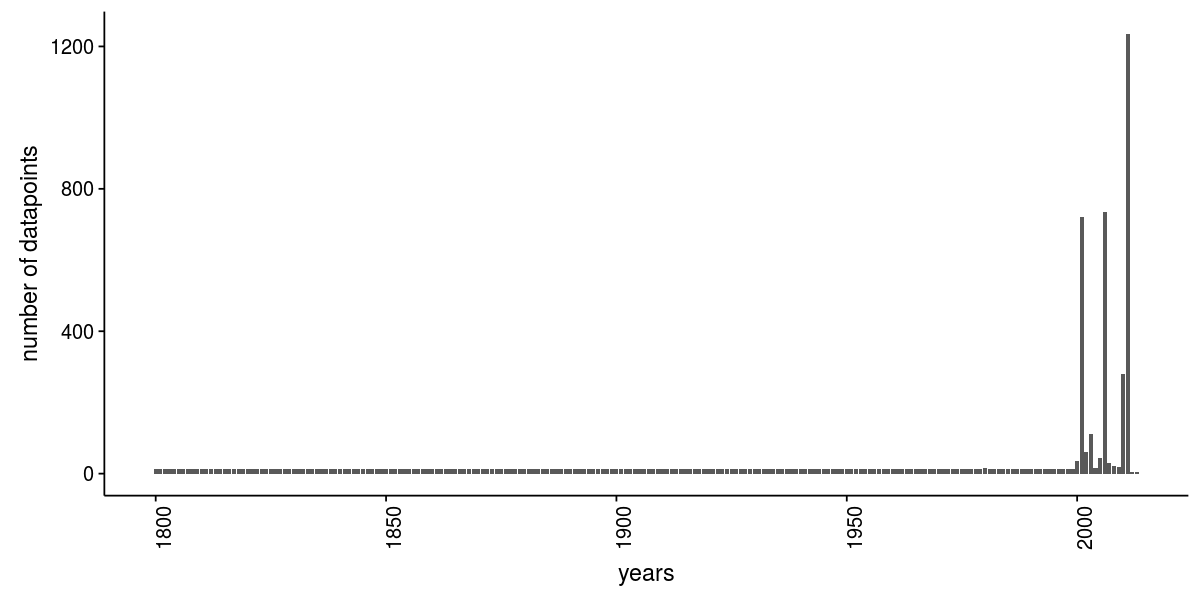

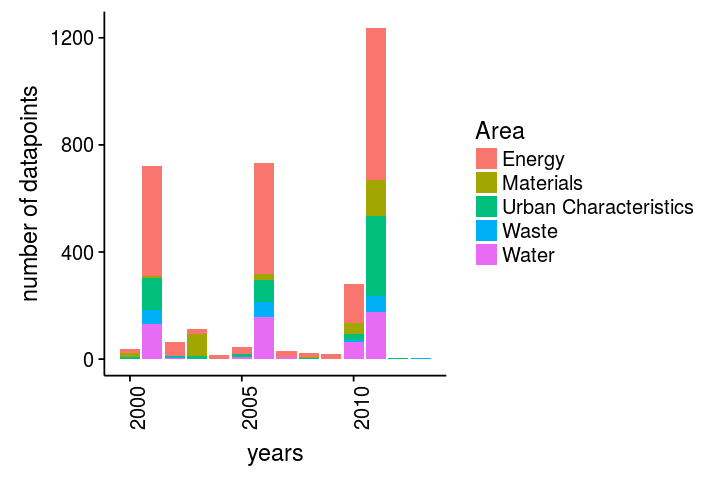

In [41]:
#year
options(repr.plot.width=10, repr.plot.height=5)

ggplot(ugmdb)+geom_bar(aes(Year, fill=Year))+theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+xlab("years")+ylab("number of datapoints")

options(repr.plot.width=6, repr.plot.height=4)
ggplot(ugmdb[ugmdb$Year>1999,])+geom_bar(aes(Year, fill=Area))+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("years")+ylab("number of datapoints")



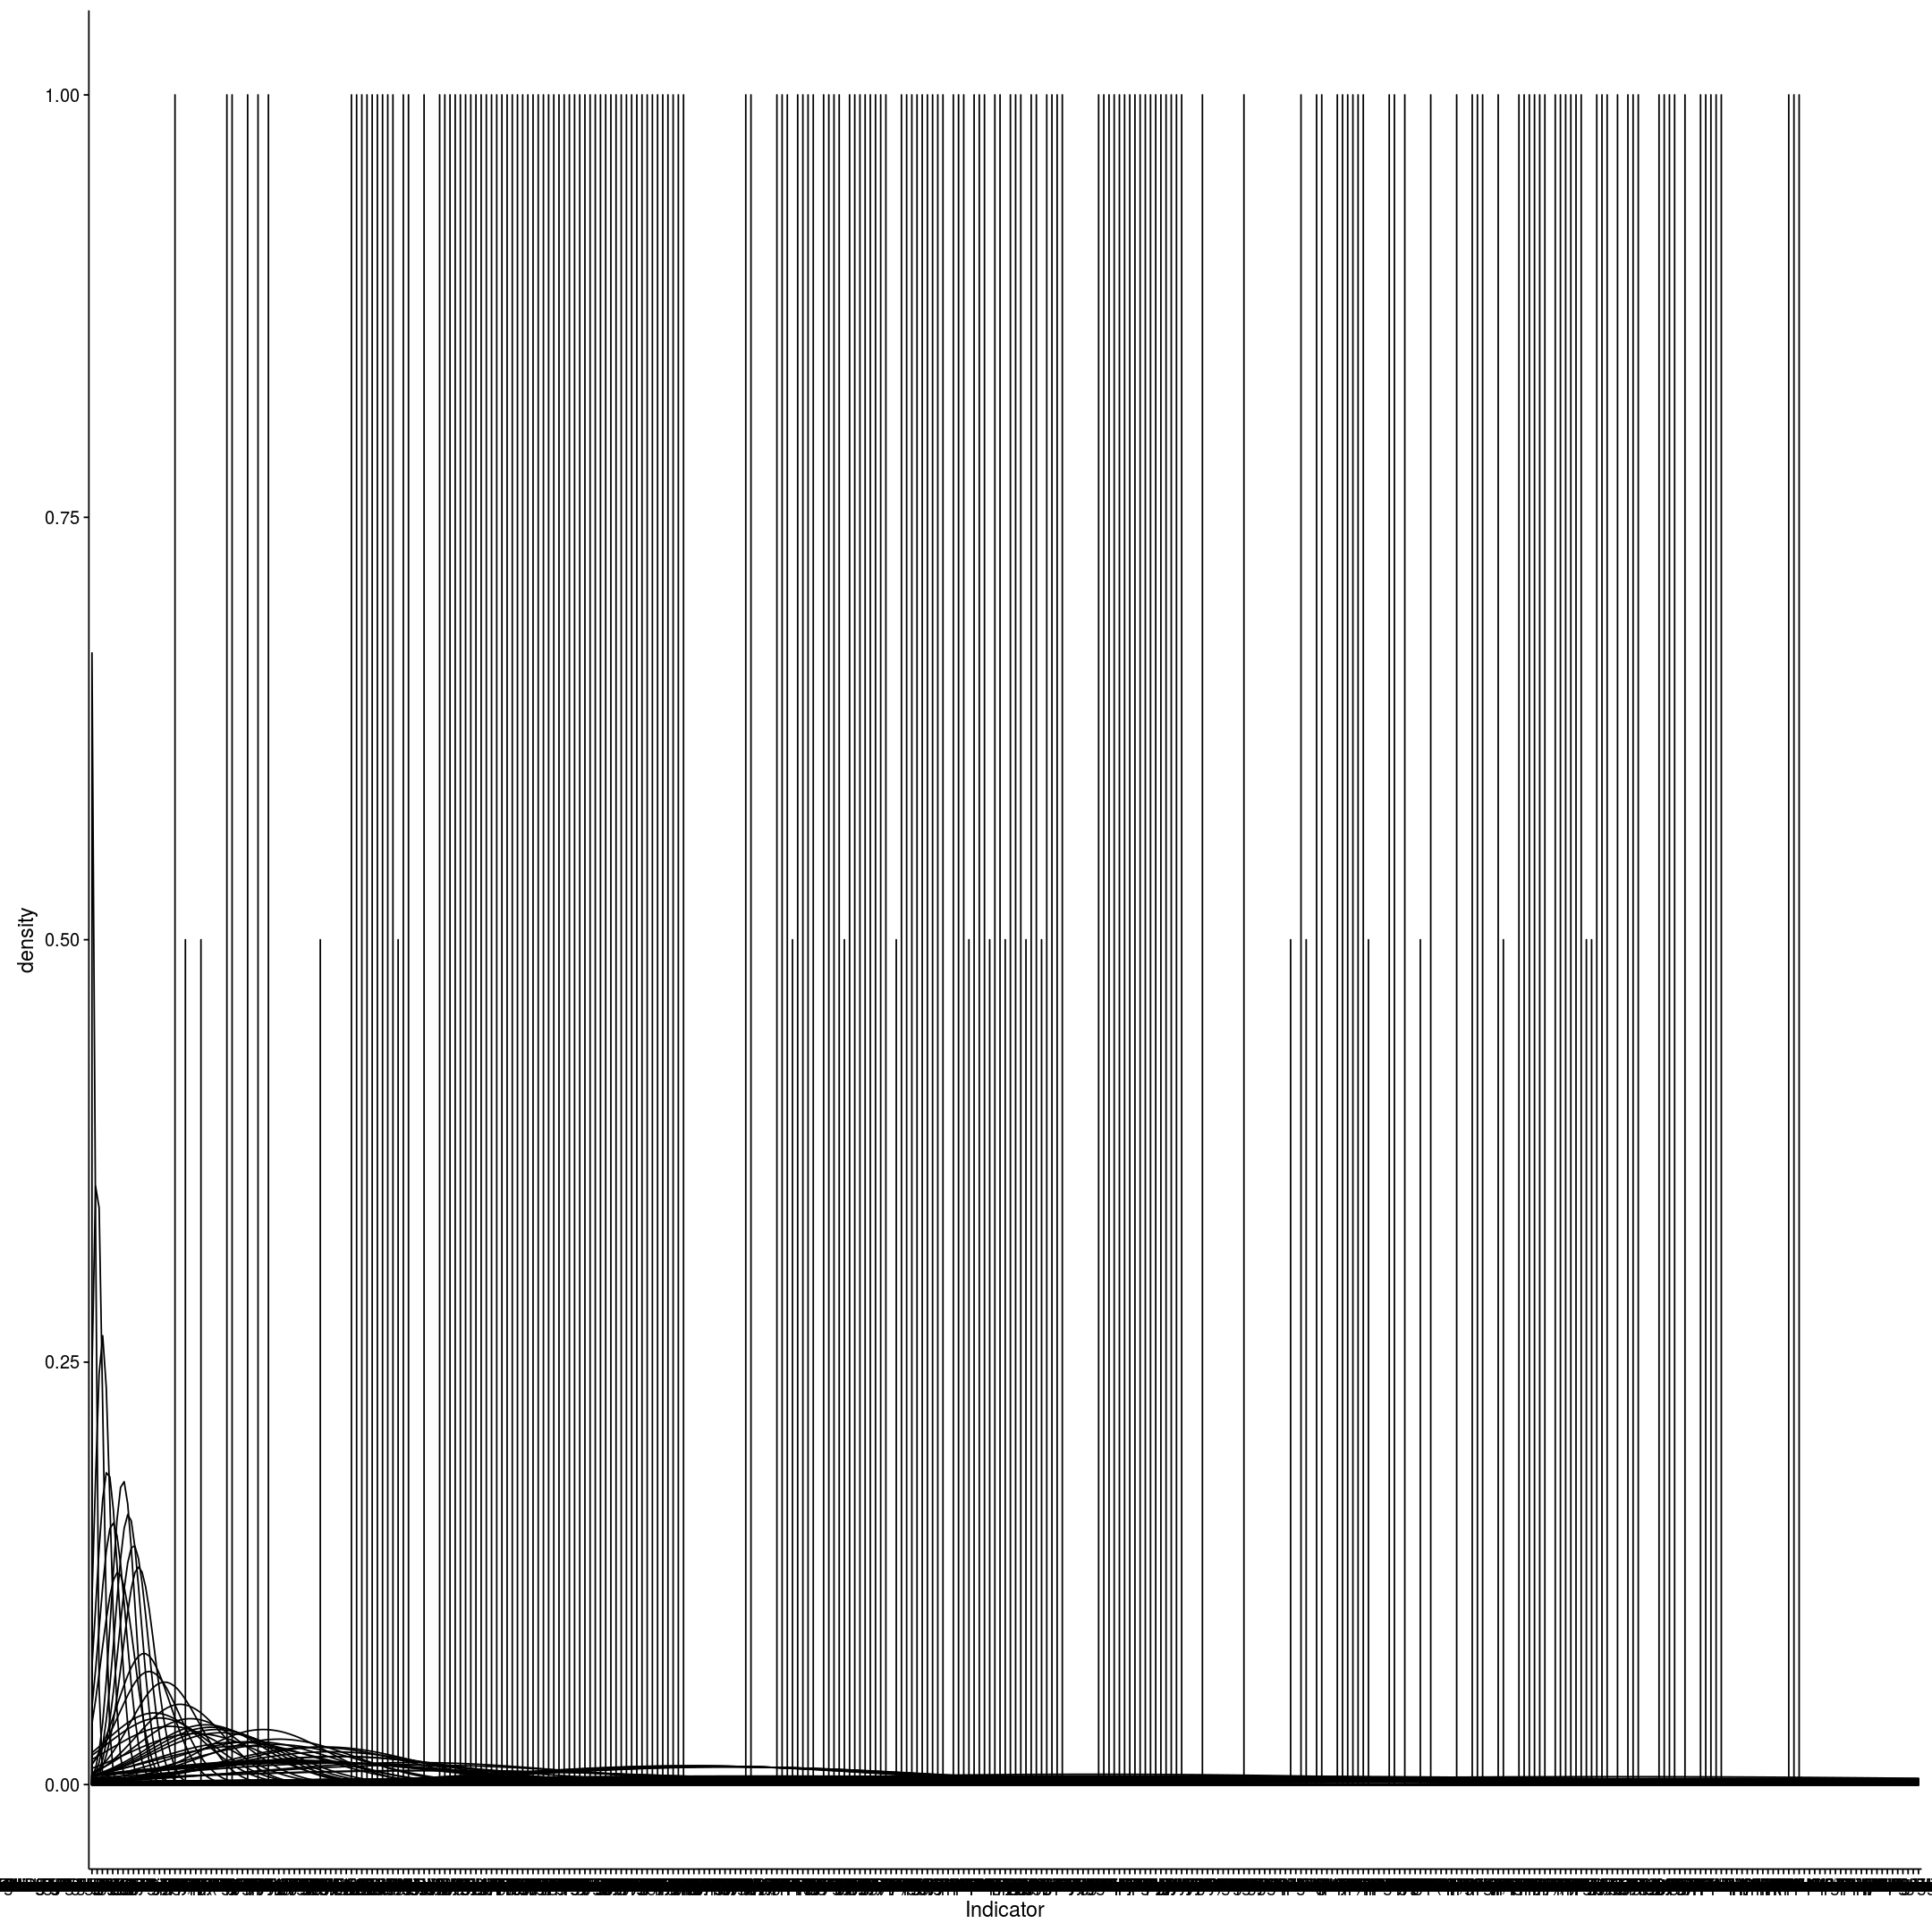

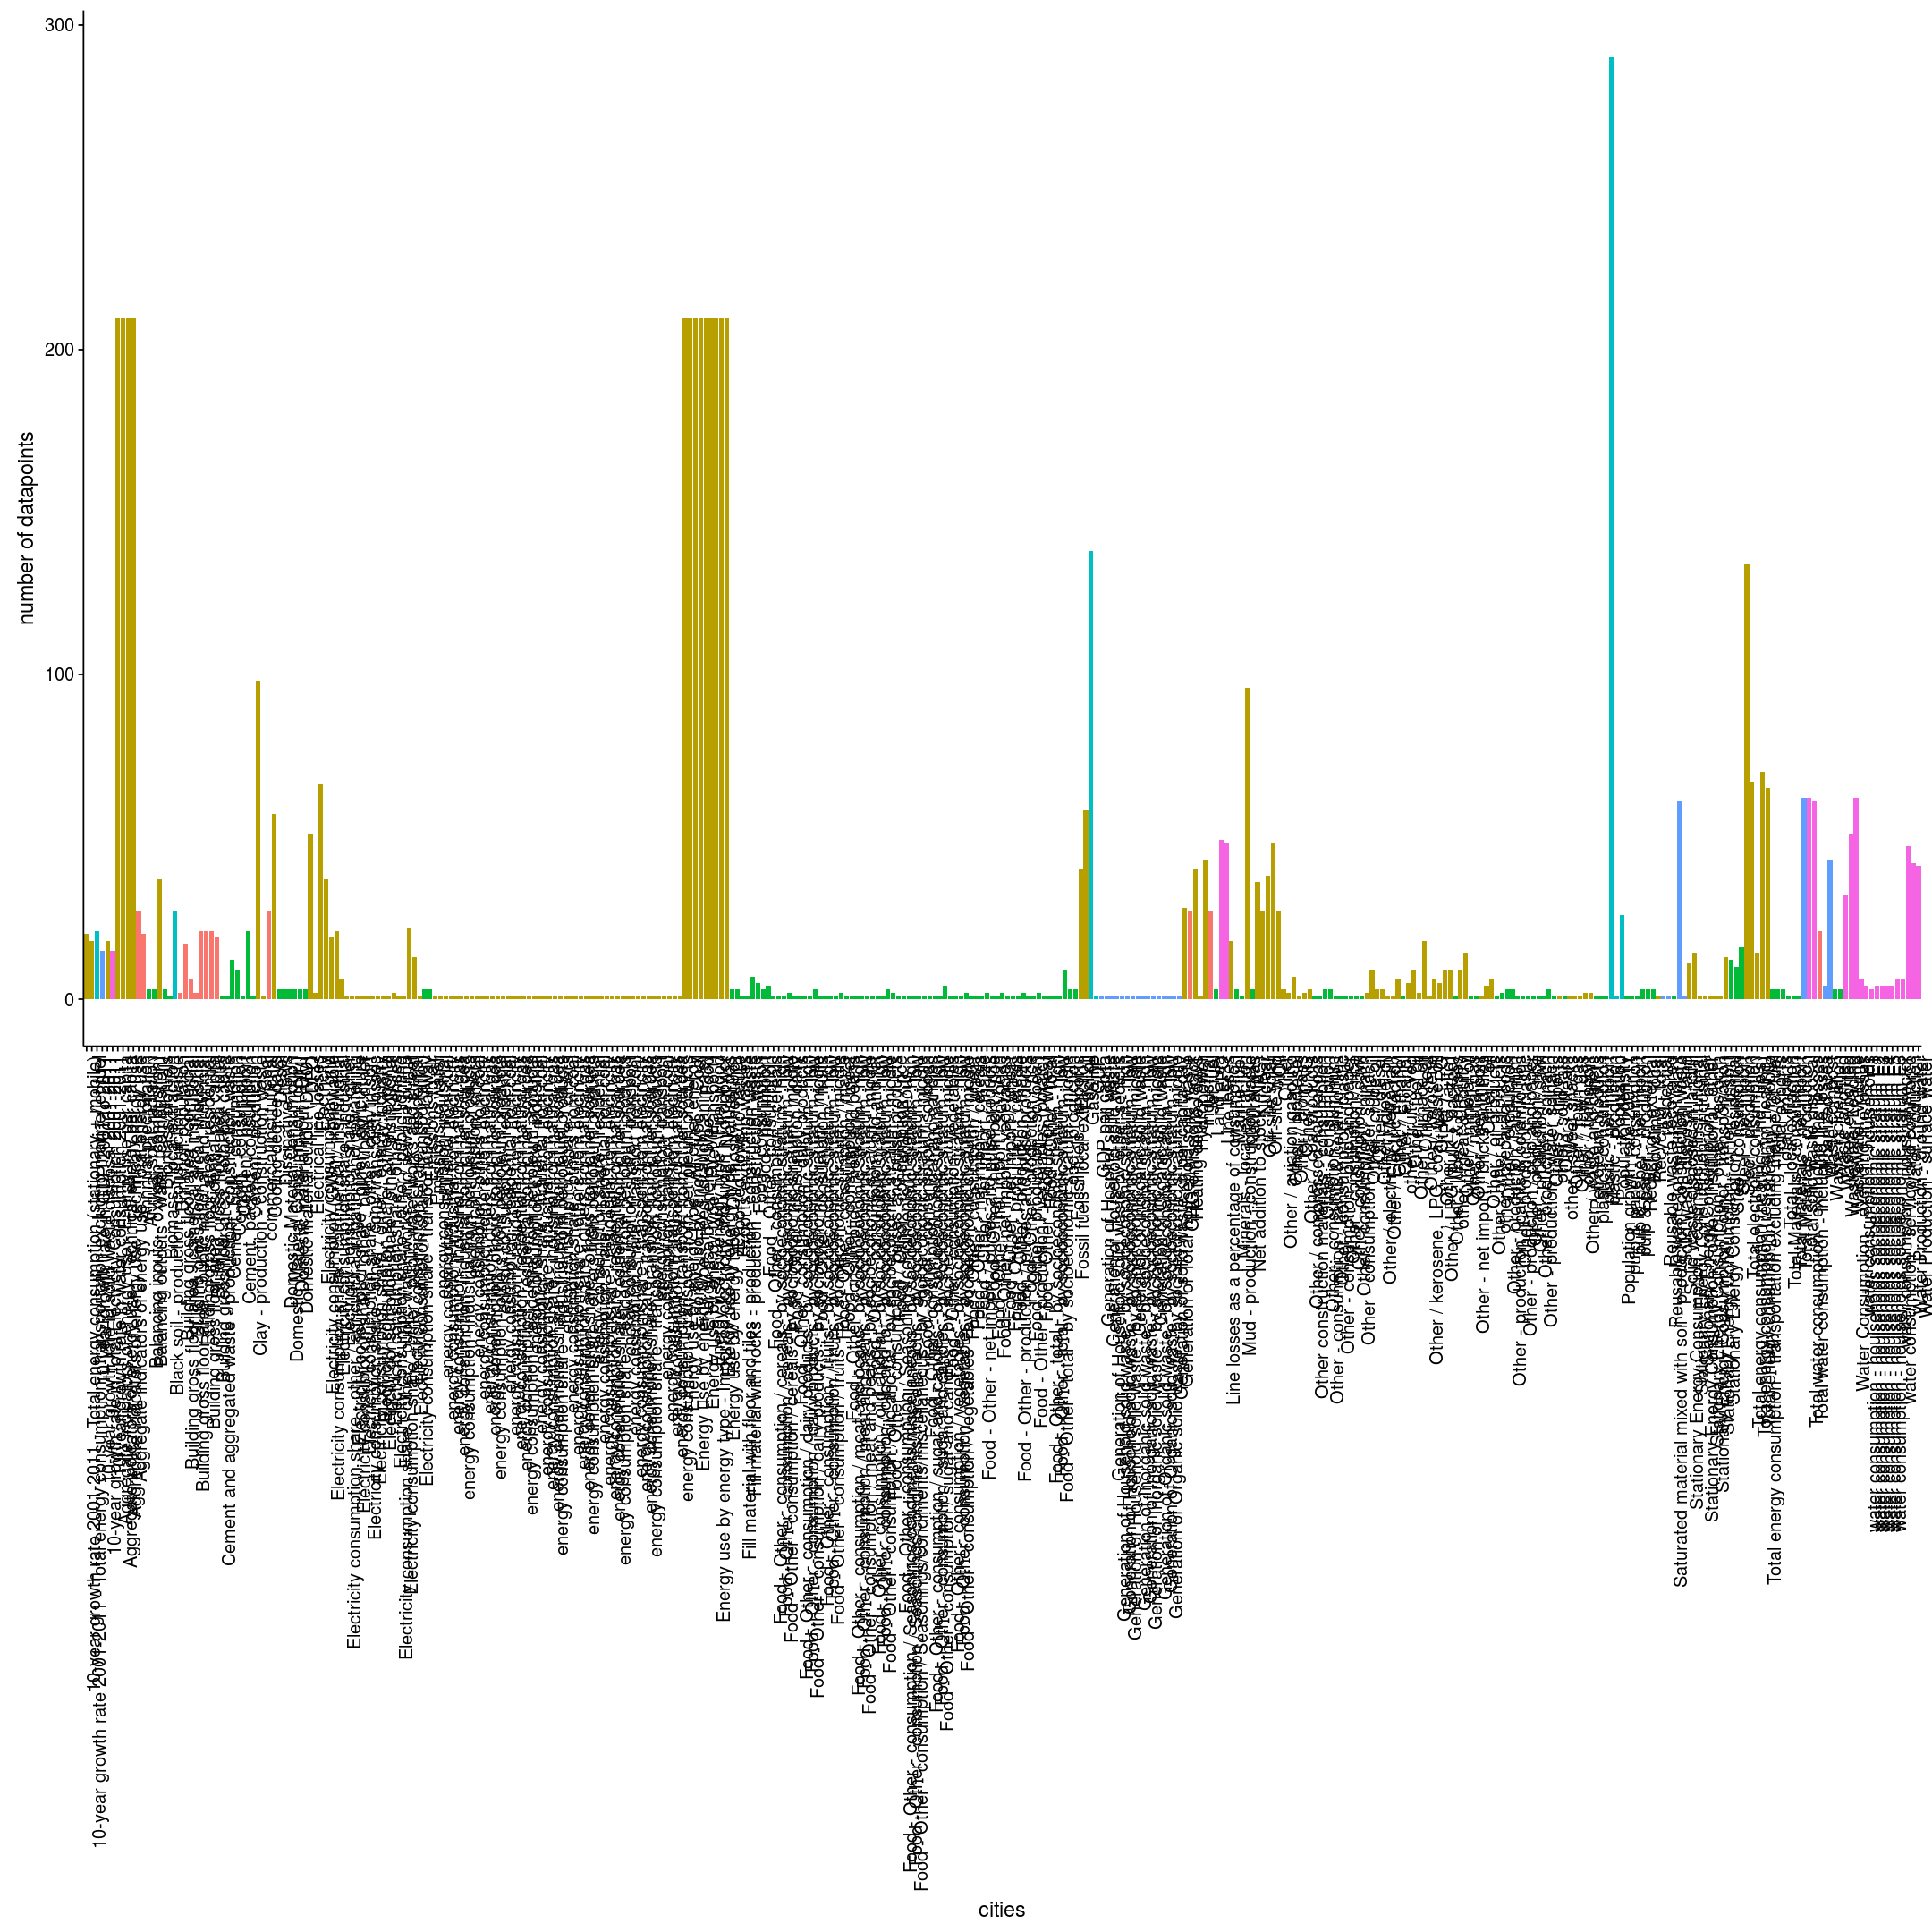

In [42]:
#Indicator
options(repr.plot.width=18, repr.plot.height=18)

ggplot(ugmdb,aes(Indicator))+geom_density()
ggplot(ugmdb)+geom_bar(aes(Indicator, fill=Area))+theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+xlab("cities")+ylab("number of datapoints")


In [43]:
table(ugmdb$Indicator)


                      10-year growth rate 2001-2011 - Total energy consumption (stationary + mobile) 
                                                                                                  20 
 10-year growth rate 2001-2011 - Total energy consumption - transportation excluding marine/jet fuel 
                                                                                                  18 
                                                             10-year growth rate in GDP 2001 to 2011 
                                                                                                  21 
                                               10-year growth rate in solid waste disposal 2001-2011 
                                                                                                  15 
                                      10-year growth rate in Total Electricity Consumption 2001-2011 
                                                                                 

In [92]:
paris <- ugmdb[ugmdb$City=="Paris"|ugmdb$City=="Paris and its dense urban Petite couronne suburbs"|ugmdb$City=="Île-de-France",]
paris

Paper_doi,Paper_name,City,Area,subArea,Year,Year (end),Indicator,Value,Unit,Per capita / total,OBS
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2010,NA,Brinkhoff population,1.040000e+07,habitants,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2001,NA,Population,1.111479e+07,habitants,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2005,NA,Population,1.153240e+07,habitants,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2006,NA,Population,1.153240e+07,habitants,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2011,NA,Population,1.185285e+07,habitants,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2001,2011,Population growth rate 2001-11,6.640000e+00,%,,calculated
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,economy,2001,NA,GDP,4.208900e+11,Euros,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,economy,2006,NA,GDP,5.010000e+11,Euros,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,economy,2011,NA,GDP,6.074390e+11,Euros,,
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,economy,2001,NA,GDP,4.676556e+11,US dollars; 2010,,


In [93]:
paris2 <- paris[paris$Indicator=="Population",][c(1,5,6,7),]
paris2

Paper_doi,Paper_name,City,Area,subArea,Year,Year (end),Indicator,Value,Unit,Per capita / total,OBS
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Urban Characteristics,demography,2001,NA,Population,11114790,habitants,,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Paris,Urban Characteristics,demography,2003,NA,Population,2166000,habitants,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Paris and its dense urban Petite couronne suburbs,Urban Characteristics,demography,2003,NA,Population,6321000,habitants,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Urban Characteristics,demography,2003,NA,Population,11259000,habitants,total,


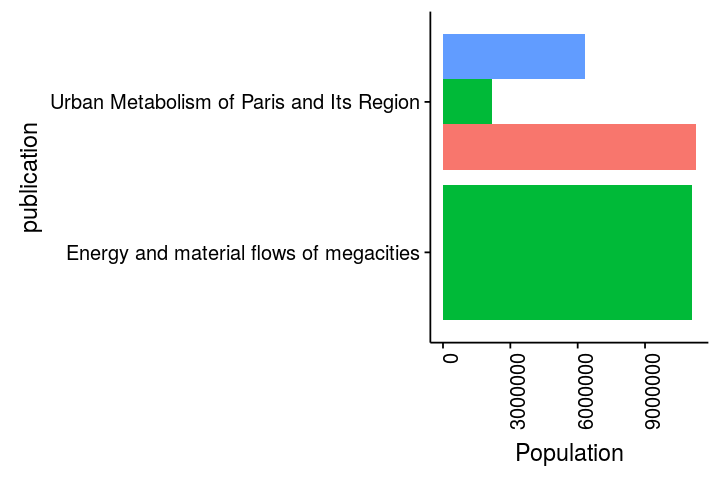

In [108]:
options(repr.plot.width=6, repr.plot.height=4)
options(scipen=10000000)


dodgewidth <- position_dodge(width=0.9)

ggplot(paris2, aes(Paper_name, Value)) +   
    geom_bar(aes(fill = City), position = "dodge", stat="identity")+
coord_flip()+
theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))+
coord_flip()+
xlab("publication")+ylab("Population")

In [119]:
paris_megacities <- paris[paris$Paper_doi=="10.1073/pnas.1504315112"]
#paris_megacities

paris_sabine <- paris[paris$Paper_doi=="10.1111/j.1530-9290.2009.00169.x"]
paris_sabine <- paris_sabine[paris_sabine$City=="Île-de-France"]
paris_sabine

Paper_doi,Paper_name,City,Area,subArea,Year,Year (end),Indicator,Value,Unit,Per capita / total,OBS
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Urban Characteristics,demography,2003,NA,Population,11259000,habitants,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Urban Characteristics,land use,2003,NA,Land area,12012,km2,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,fossil fuels,2003,NA,Fossil fuels - local extraction,540,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,minerals,2003,NA,Minerals - local extraction,16990,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,biomass,2003,NA,Biomass - local extraction,6010,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,MFA indicator,2003,NA,Total - local extraction,2340,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,fossil fuels,2003,NA,Fossil fuels - imports,26100,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,other,2003,NA,Others - imports,88350,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,MFA indicator,2003,NA,Total - imports,114450,Kt,total,
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,MFA indicator,2003,NA,Domestic material input - DMI,137990,Kt,total,


Paper_doi,Paper_name,City,Area,subArea,Year,Year (end),Indicator,Value,Unit,Per capita / total,OBS
10.1073/pnas.1504315112,Energy and material flows of megacities,Paris,Waste,final disposal,2002,NA,Solid waste disposal - land,1215,Kt,,indicated as 2001 in the publication
10.1111/j.1530-9290.2009.00169.x,Urban Metabolism of Paris and Its Region,Île-de-France,Materials,waste,2003,NA,Waste landfilled,20010,Kt,total,


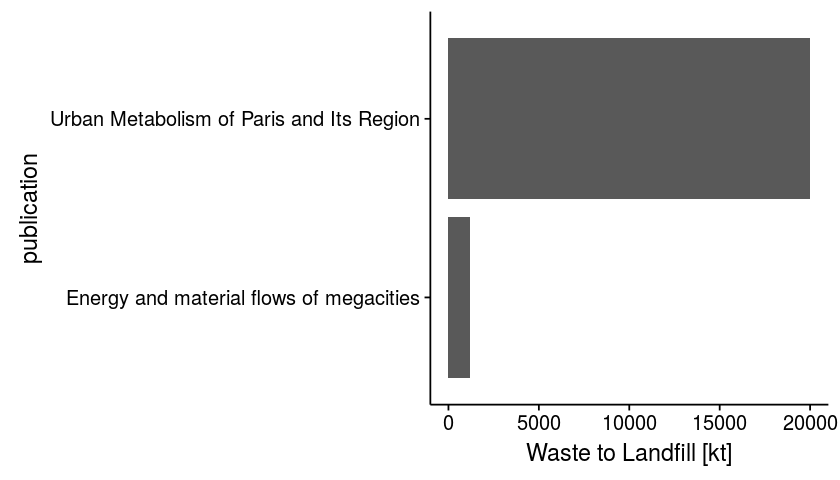

In [136]:
paris_megacities_waste <- paris_megacities[paris_megacities$Indicator=="Solid waste disposal - land"&paris_megacities$Year=="2002",]
paris_sabine_waste <- paris_sabine[paris_sabine$Indicator=="Waste landfilled"]

df <- rbind(paris_megacities_waste, paris_sabine_waste)
df


options(repr.plot.width=7, repr.plot.height=4)


ggplot(df, aes(Paper_name, Value))+geom_bar(stat="identity")+
coord_flip()+
xlab("publication")+ylab("Waste to Landfill [kt]")
#Waste landfilled



#Total solid waste disposal
#Solid waste disposal - land

# map

In [64]:
library("maps")
require(ggplot2)
require(ggmap)
require(maps)

In [72]:
cities <- unique(ugmdb$City)
cities <- cities[-c(28,29)]
cities_geo <- cbind(geocode(as.character(cities)), cities)
cities_geo

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paris&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Moscow&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico%20City&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lagos&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sao%20Paulo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rio%20de%20Janeiro&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/

lon,lat,cities
-0.1277583,51.507351,London
2.3522219,48.856614,Paris
37.6173000,55.755826,Moscow
-74.0059413,40.712784,New York
-118.2436849,34.052234,Los Angeles
-99.1332080,19.432608,Mexico City
3.3792057,6.524379,Lagos
-46.6333094,-23.550520,Sao Paulo
-43.1728965,-22.906847,Rio de Janeiro
-58.3815591,-34.603684,Buenos Aires


In [85]:
#Using GGPLOT, plot the Base World Map
mp <- NULL
mapWorld <- borders("world", colour="gray60", fill="gray60") # create a layer of borders

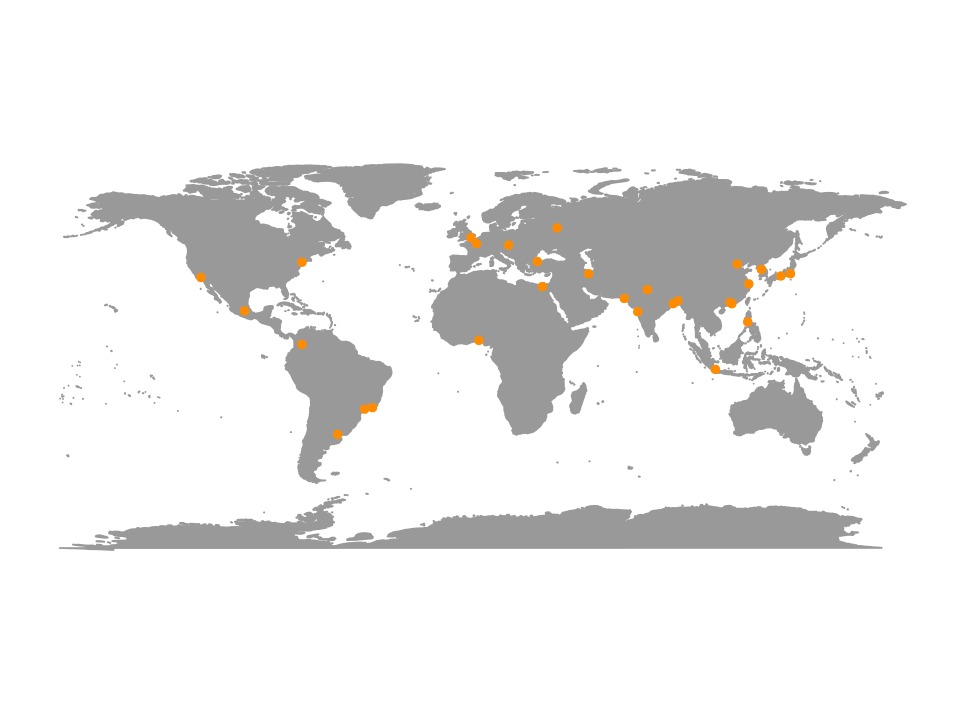

In [93]:
#Now Layer the cities on top
mp <- ggplot() +   mapWorld
mp <- mp +  geom_point(data=cities_geo, aes(x=lon, y=lat), color="darkorange", size=2) + coord_equal()
mp + theme(axis.line=element_blank(),axis.text.x=element_blank(),
          axis.text.y=element_blank(),axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),legend.position="none",
          panel.background=element_blank(),panel.border=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank())

 

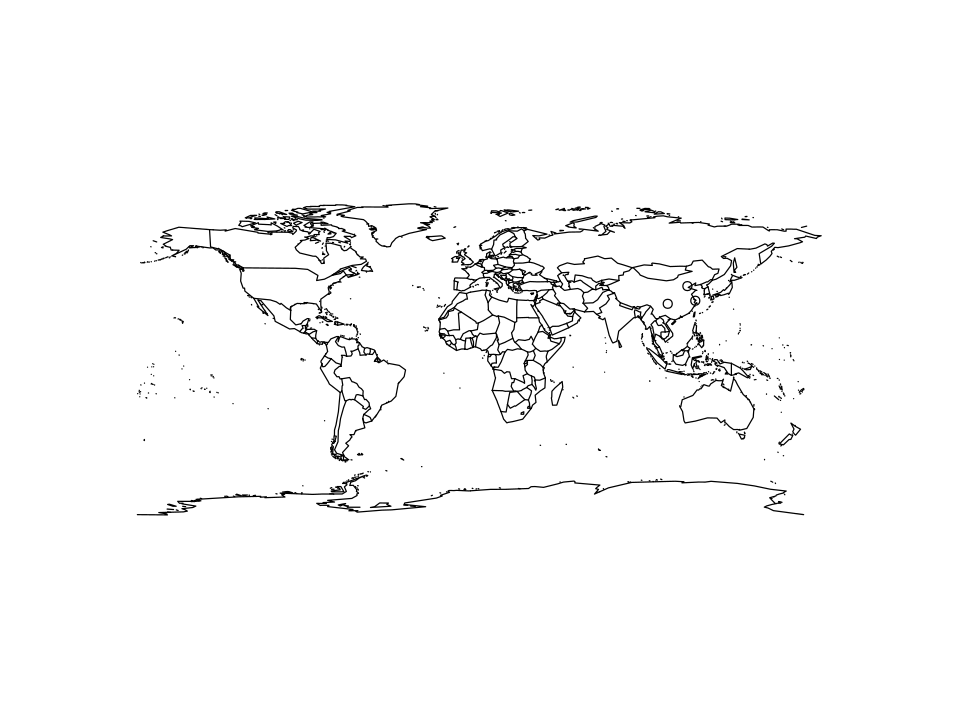

In [59]:
map("world")

map.cities(country = "China", capitals = 2)